In [1]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv("../dataset/cmi_internet.csv")

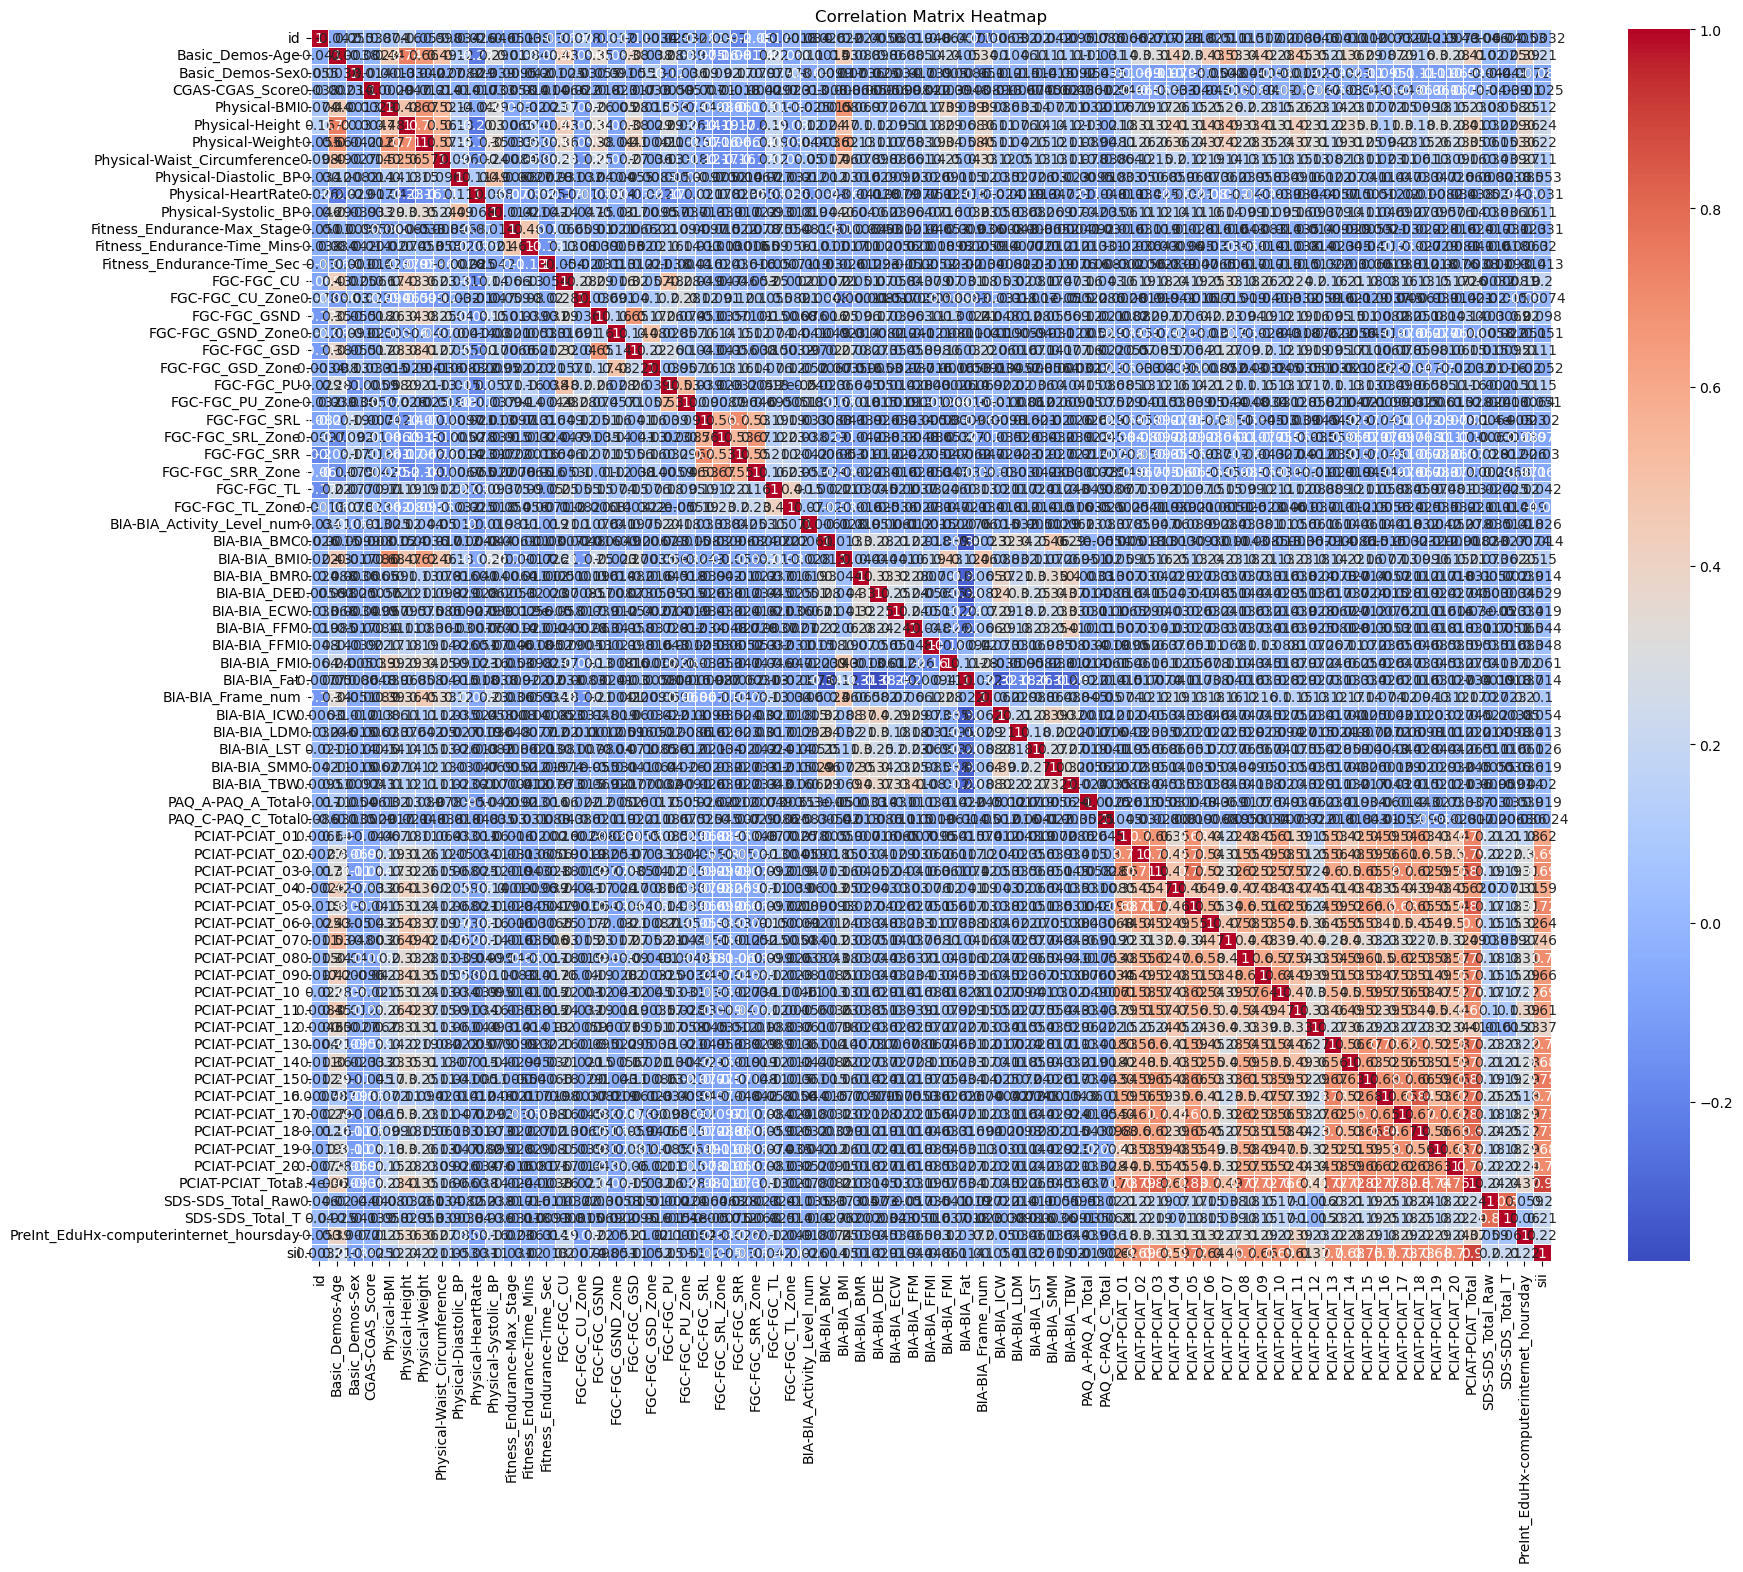

In [5]:
#considering only numerical variables for correlation analysis
numerical_df = df.select_dtypes(include=[np.number])
#calculating the correlation matrix
correlation_matrix = numerical_df.corr()
#visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
#report correlations greater than 0.5 or less than -0.5 writing the variable names and the correlation value
threshold = 0.7
strong_correlations = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
strong_correlations = strong_correlations.stack().reset_index()
strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_correlations = strong_correlations[strong_correlations['Variable 1'] != strong_correlations['Variable 2']]
print(strong_correlations)


          Variable 1         Variable 2  Correlation
2    Basic_Demos-Age    Physical-Height     0.740856
6    Physical-Height    Basic_Demos-Age     0.740856
8    Physical-Height    Physical-Weight     0.705090
9    Physical-Weight    Physical-Height     0.705090
27       FGC-FGC_SRL        FGC-FGC_SRR     0.701419
..               ...                ...          ...
133              sii     PCIAT-PCIAT_15     0.749985
134              sii     PCIAT-PCIAT_17     0.725308
135              sii     PCIAT-PCIAT_18     0.730069
136              sii     PCIAT-PCIAT_20     0.700310
137              sii  PCIAT-PCIAT_Total     0.898571

[68 rows x 3 columns]


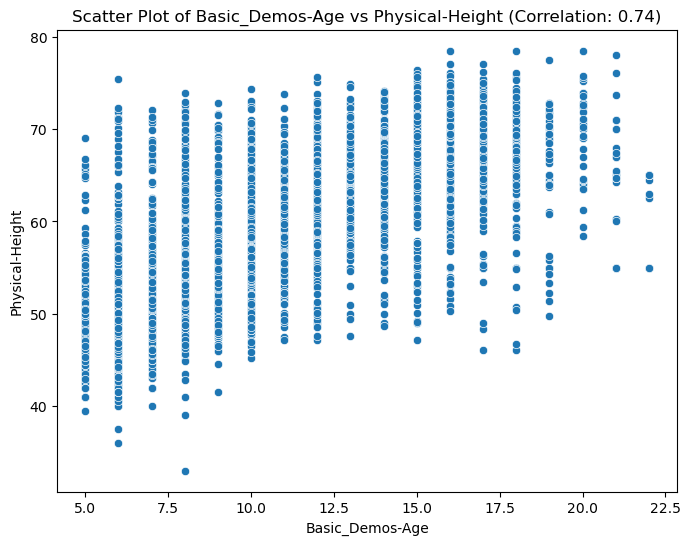

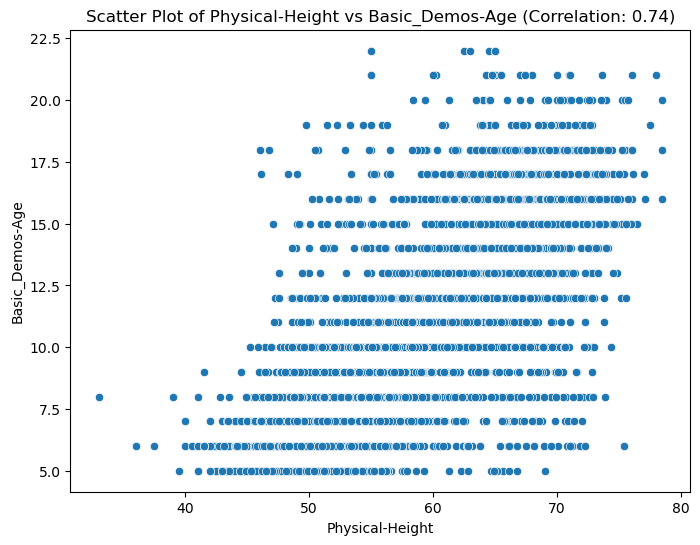

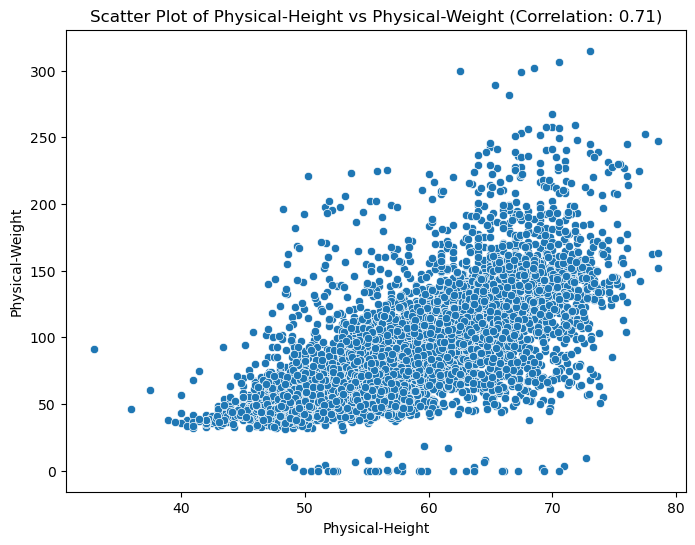

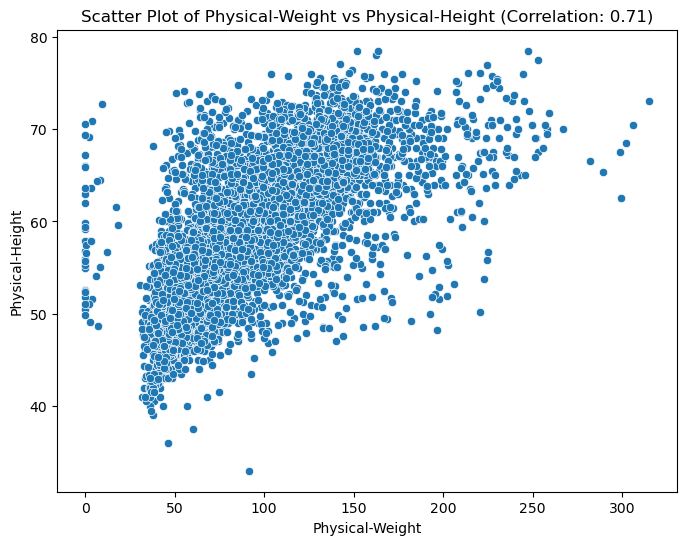

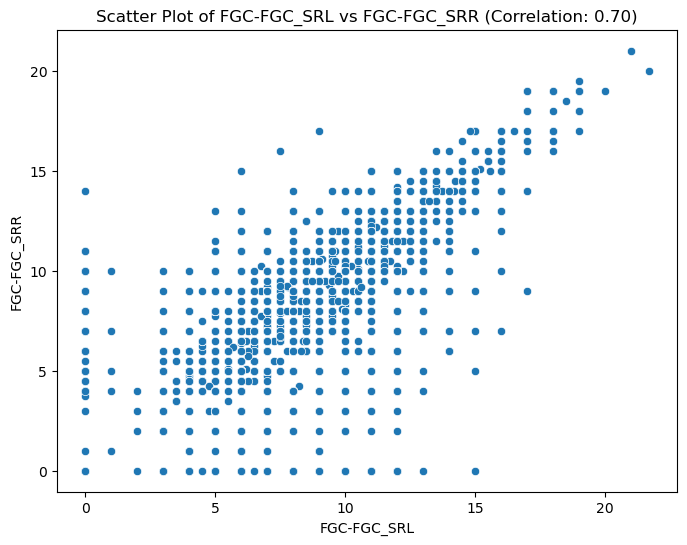

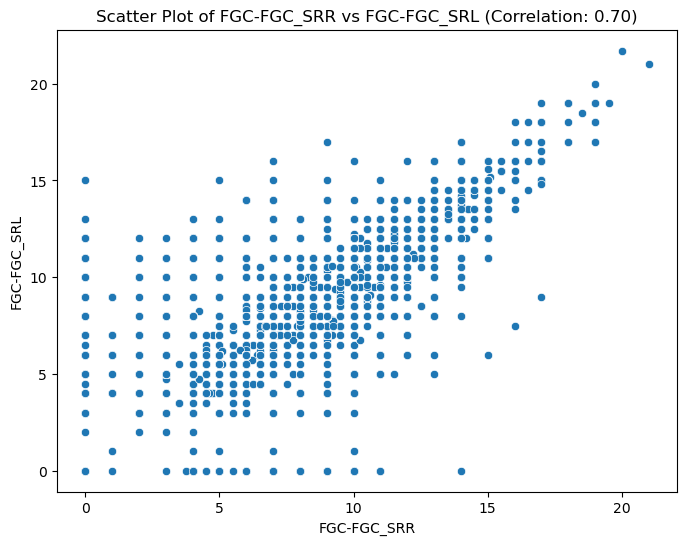

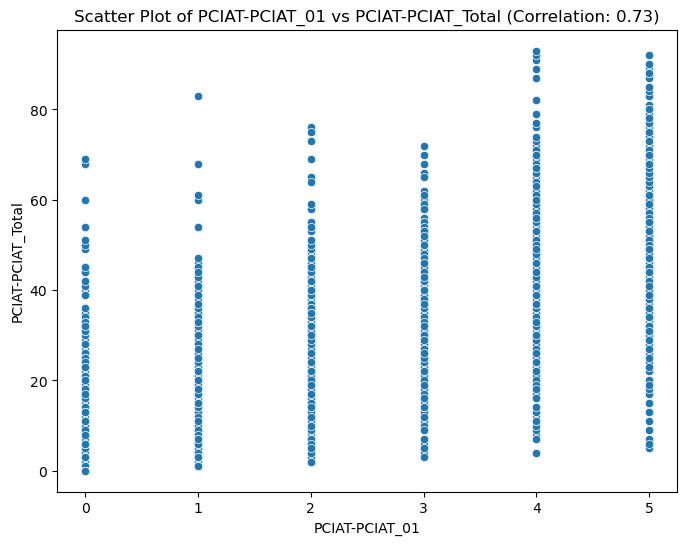

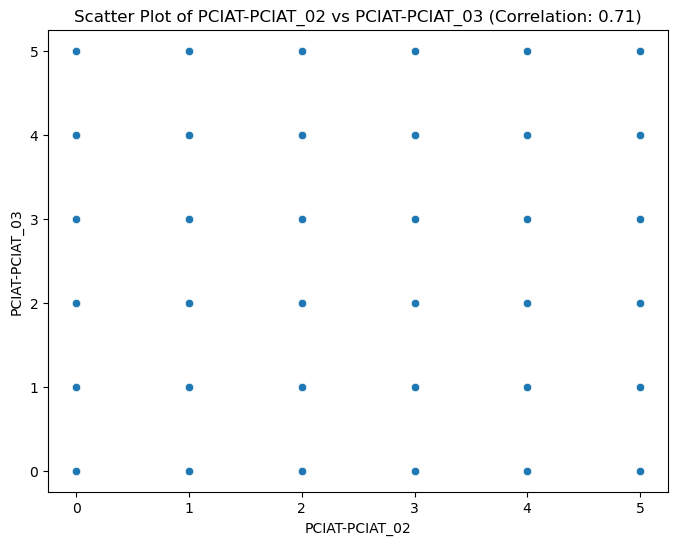

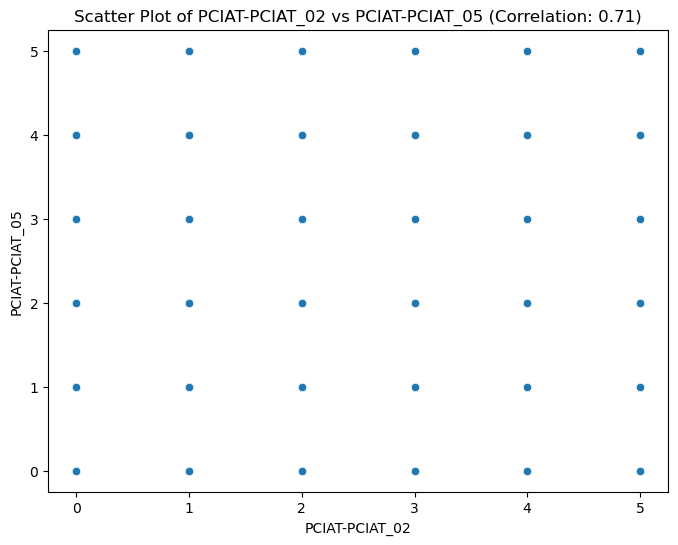

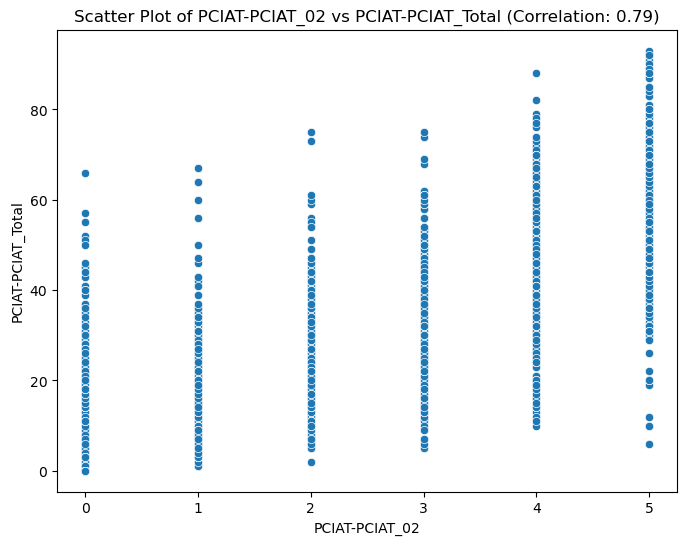

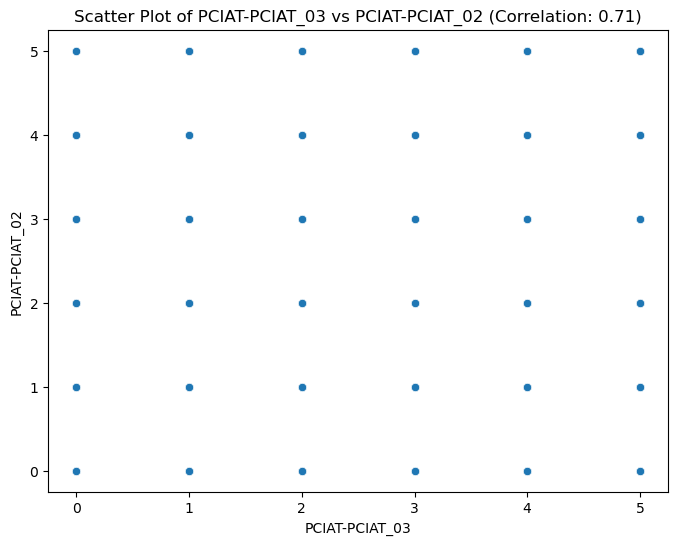

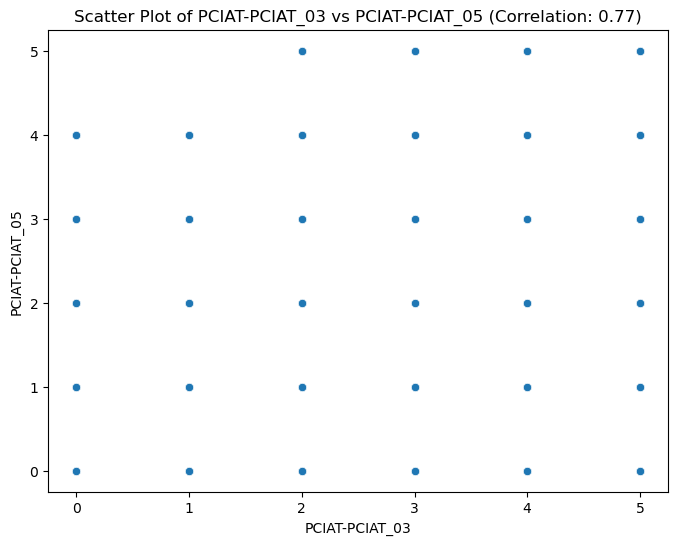

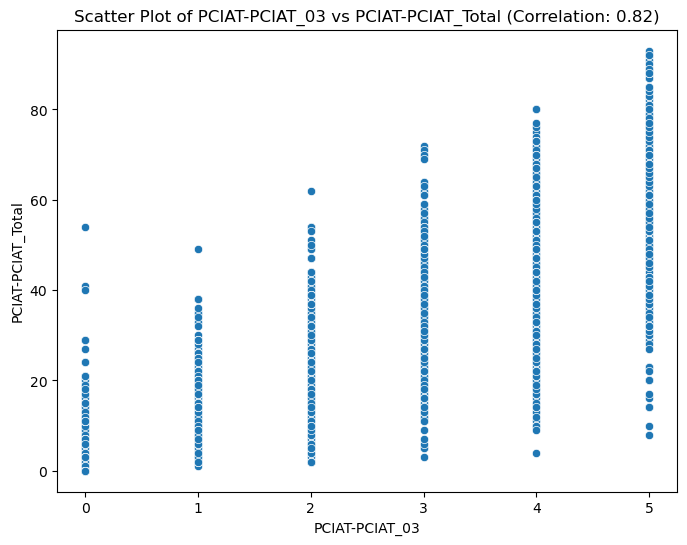

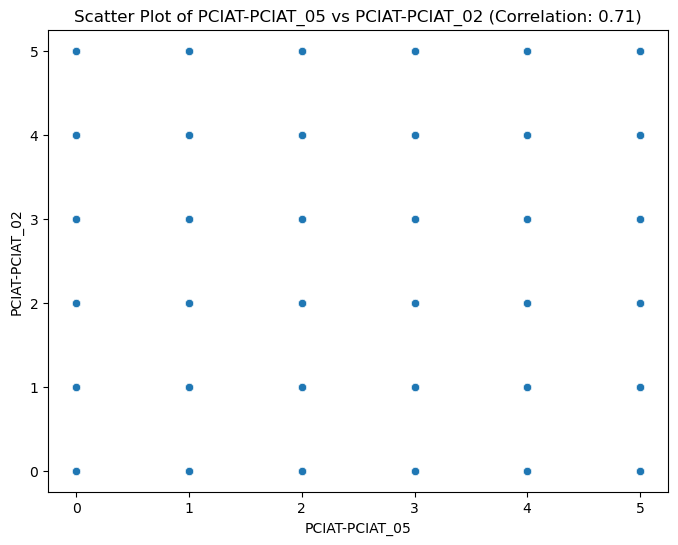

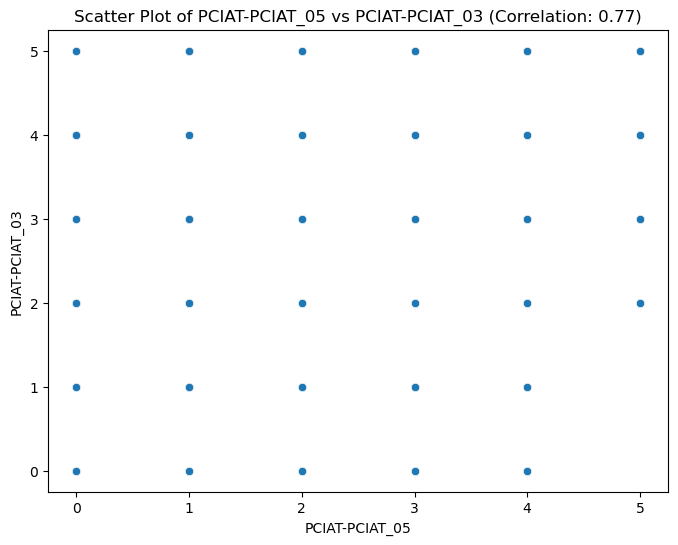

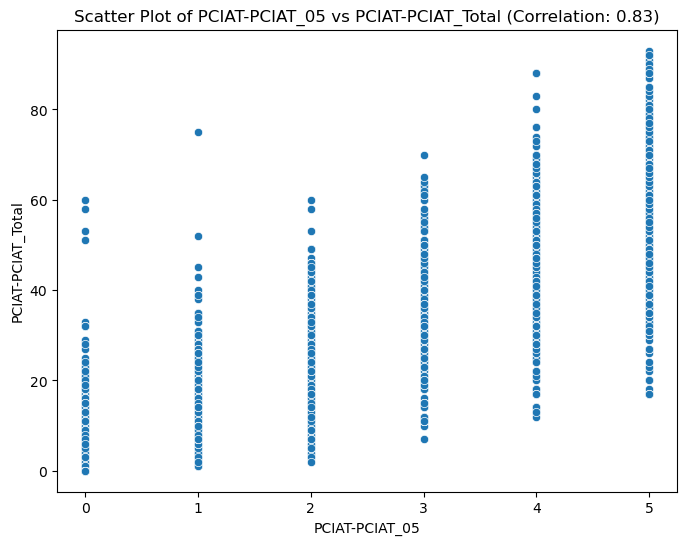

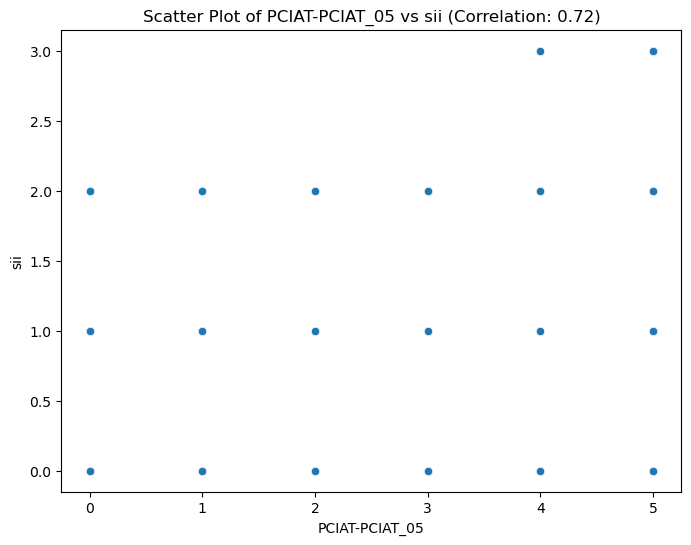

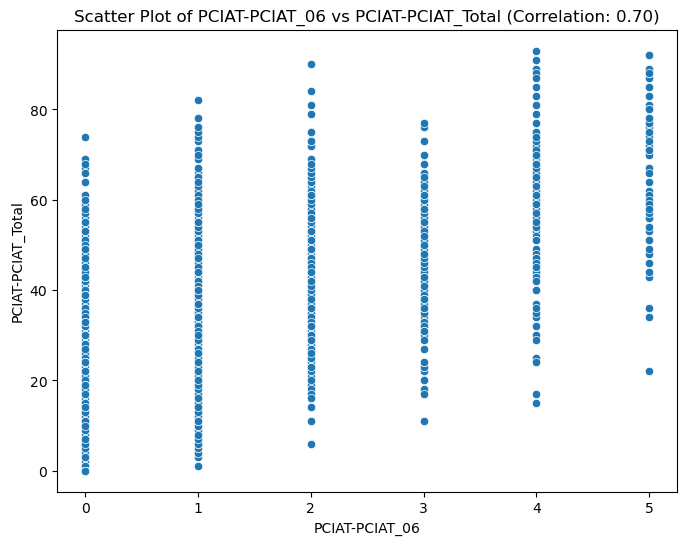

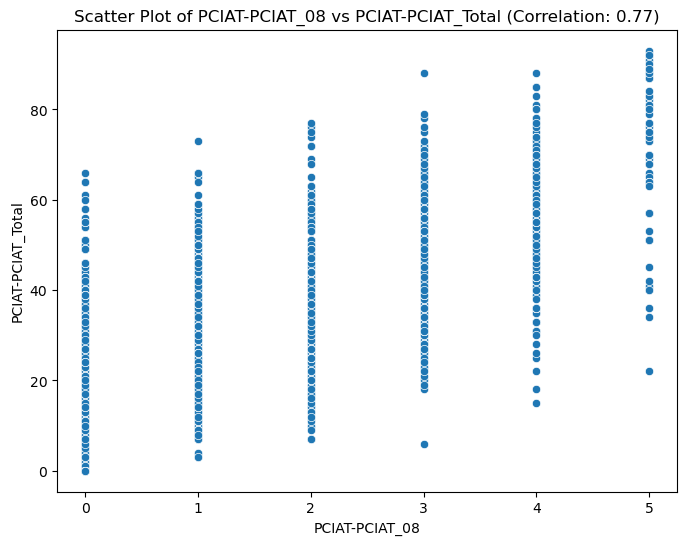

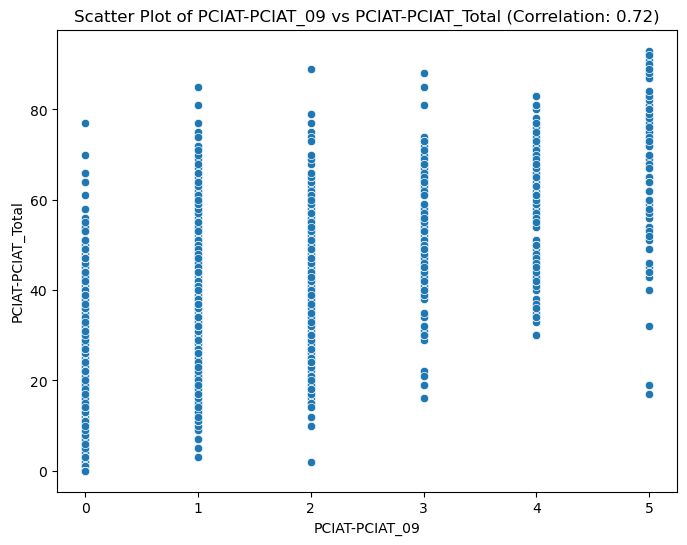

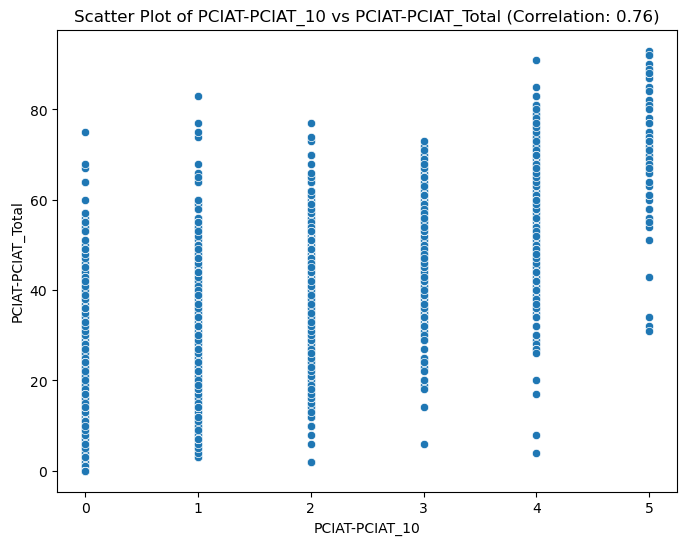

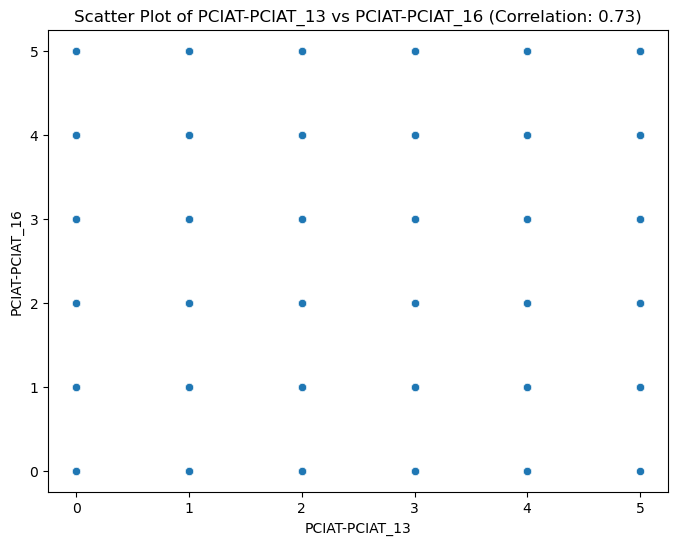

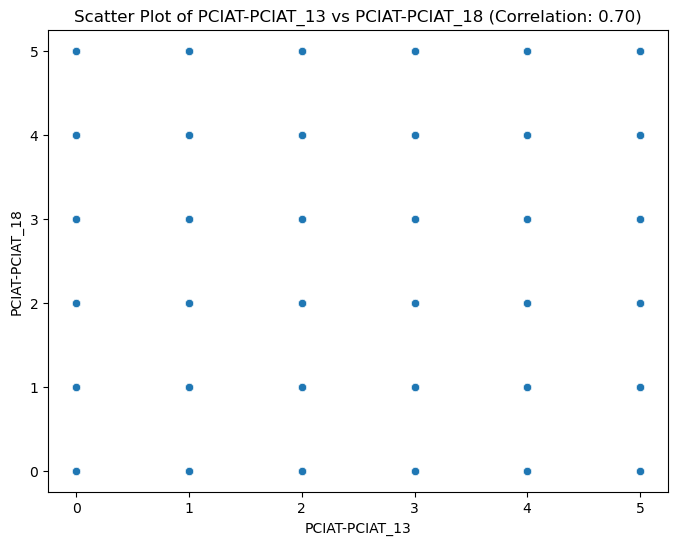

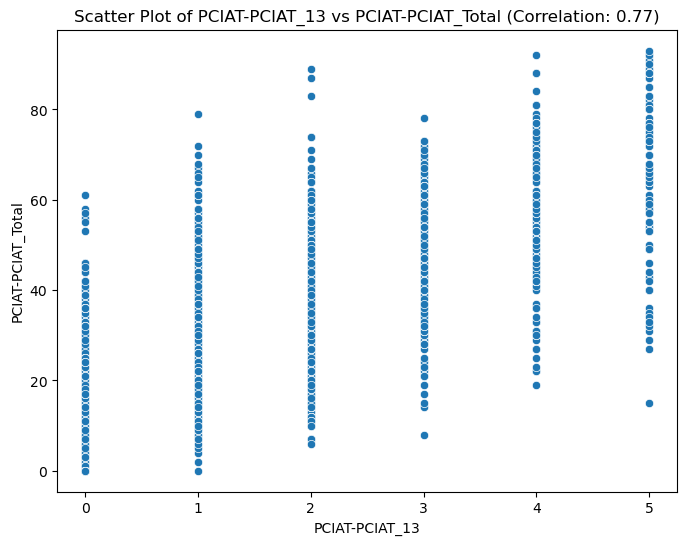

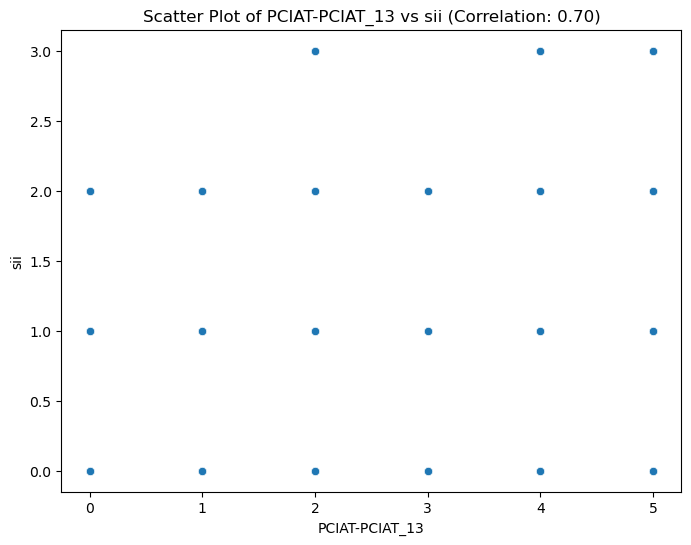

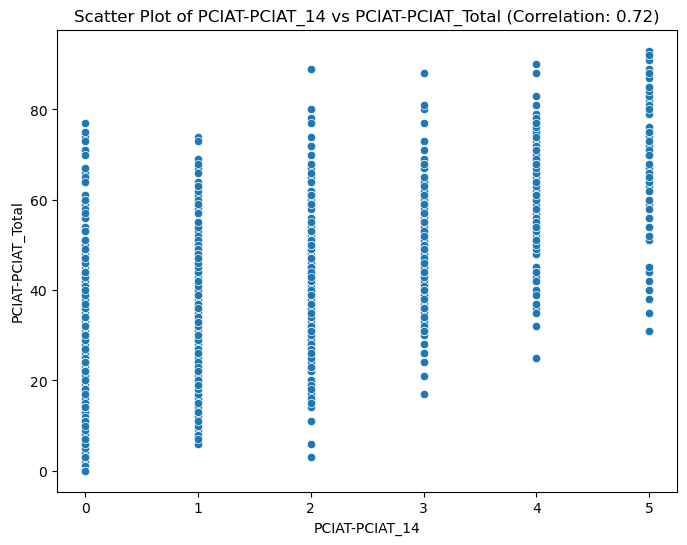

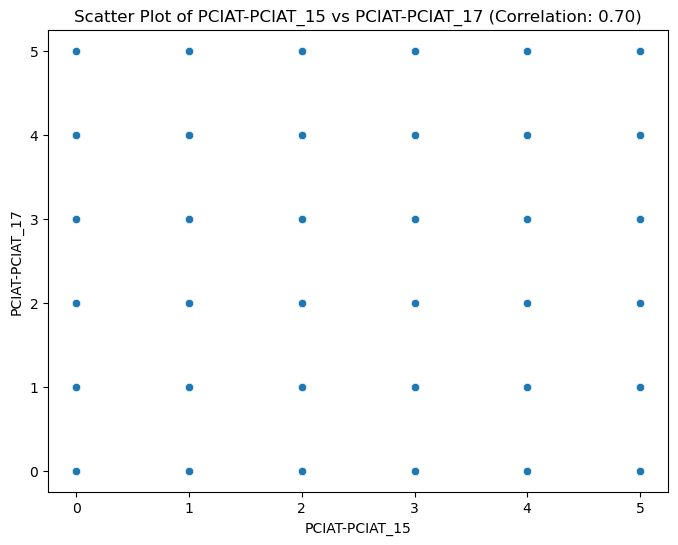

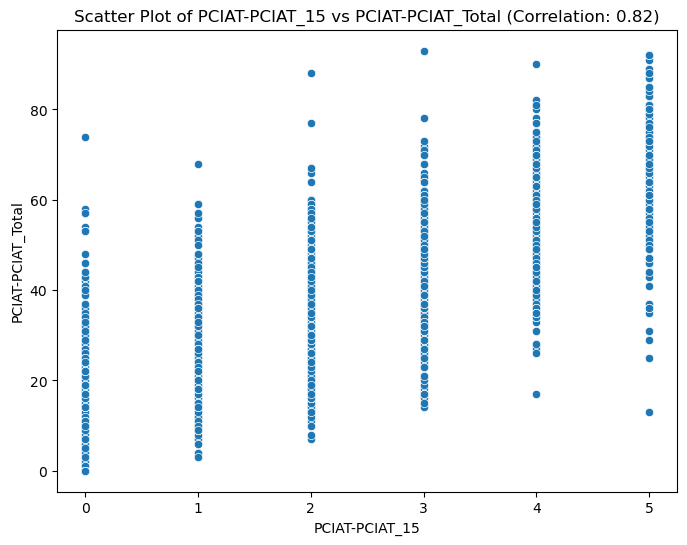

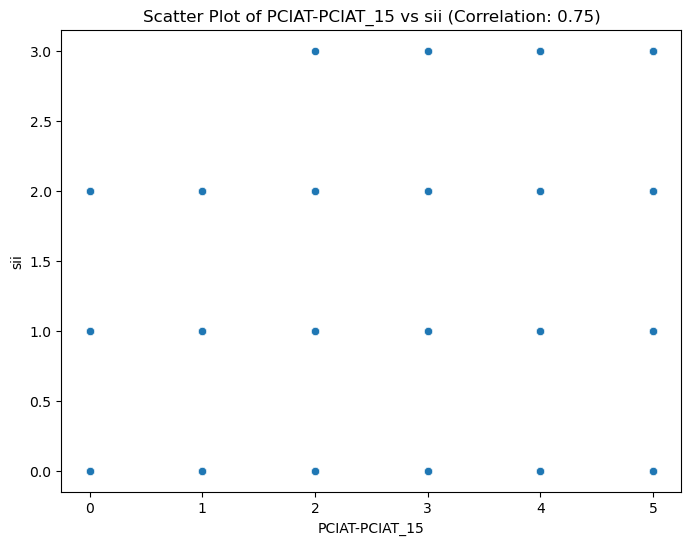

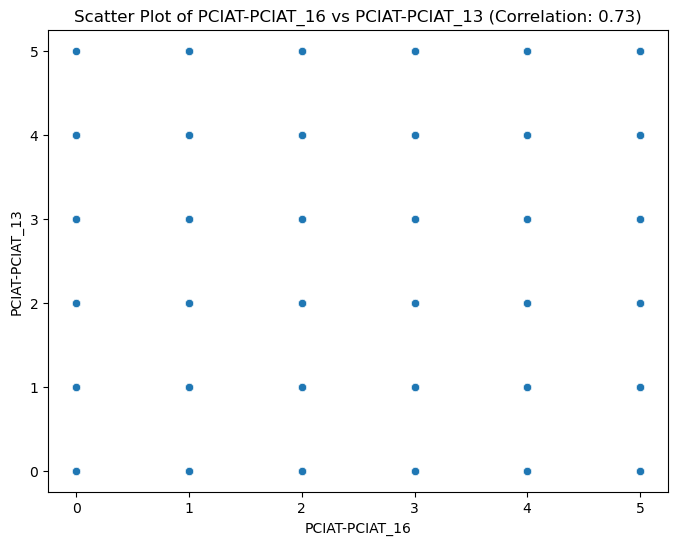

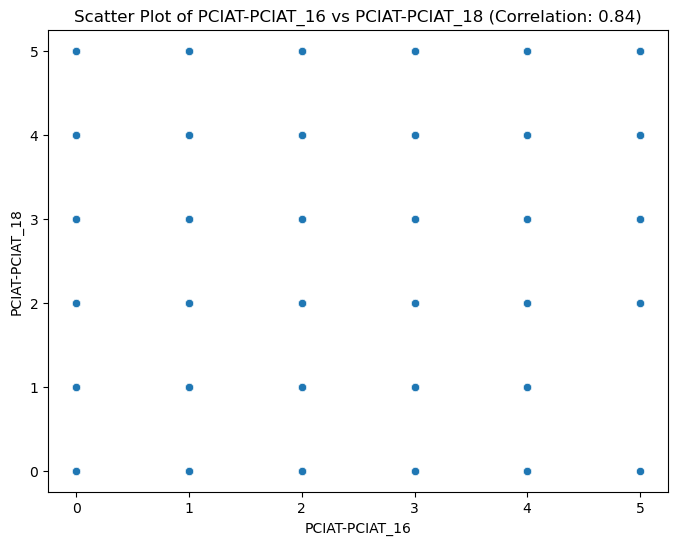

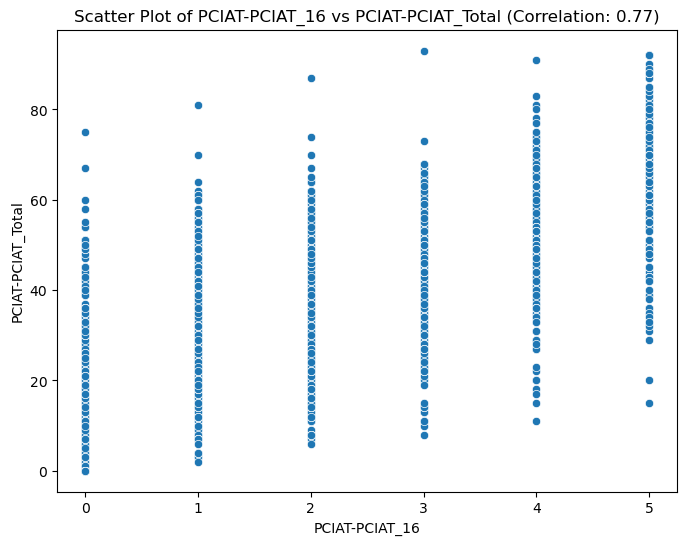

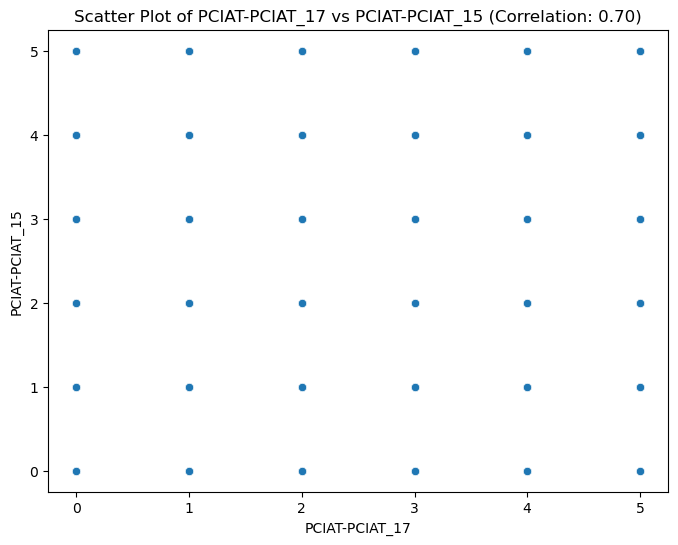

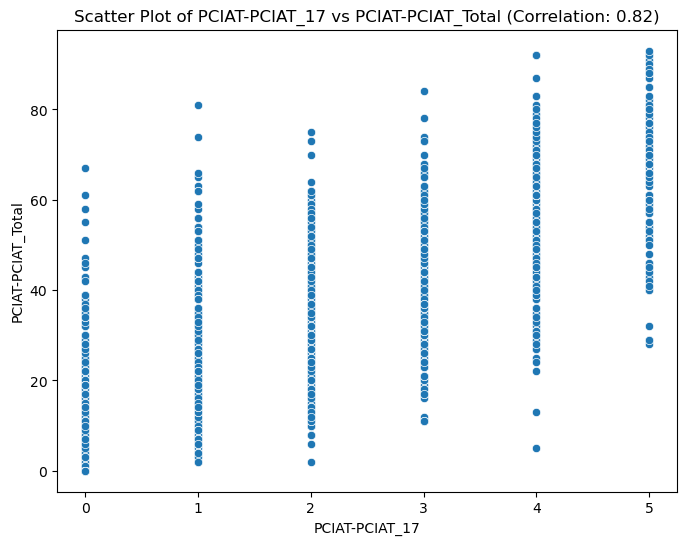

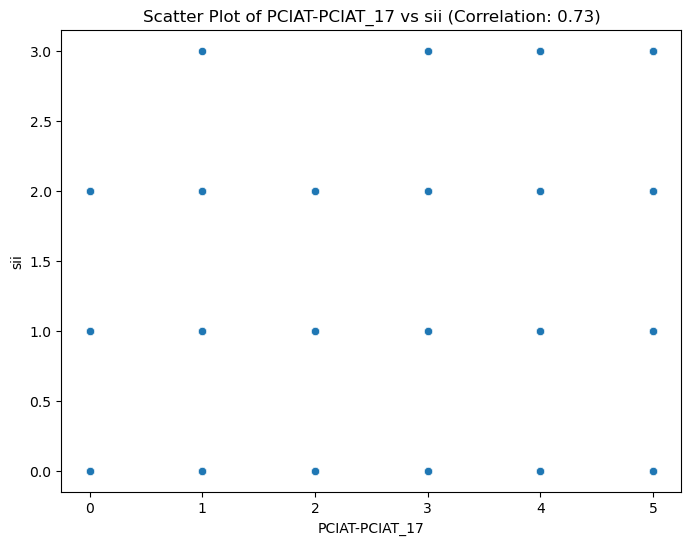

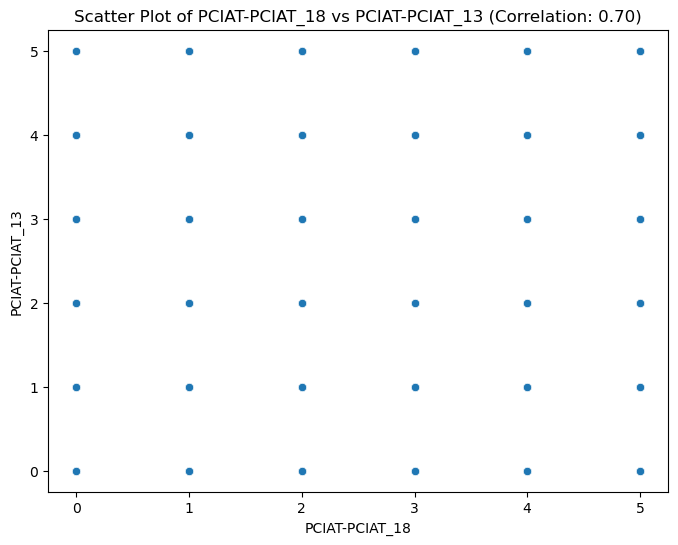

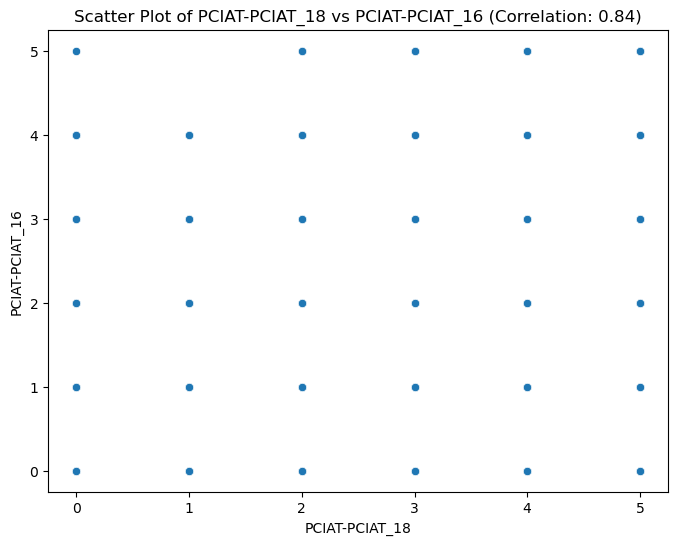

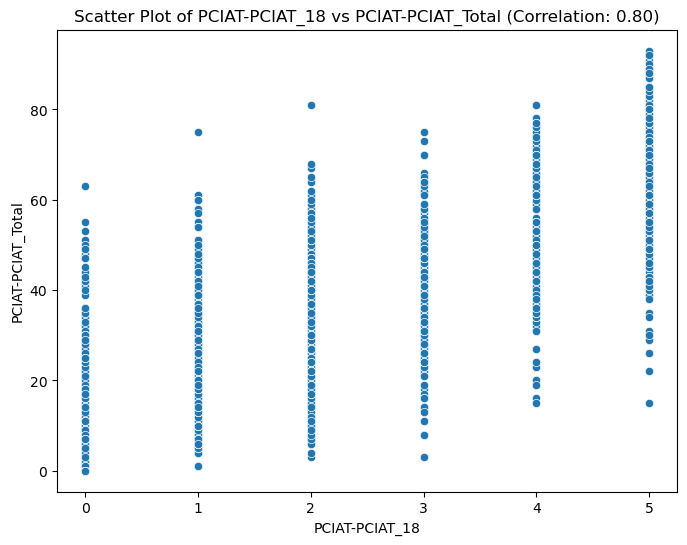

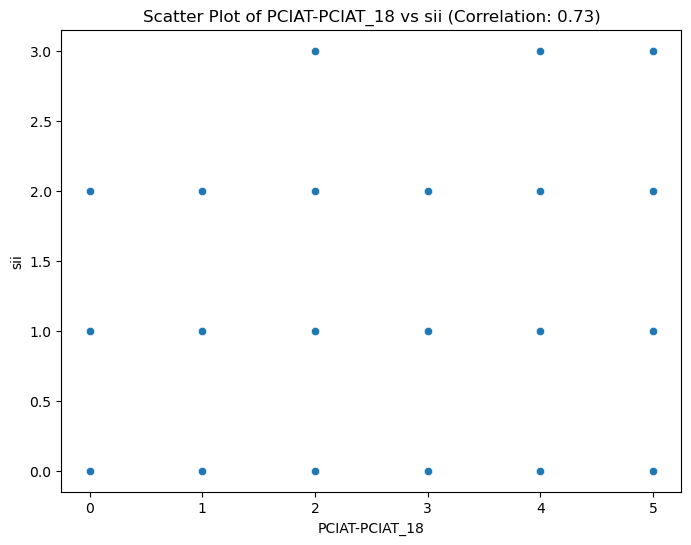

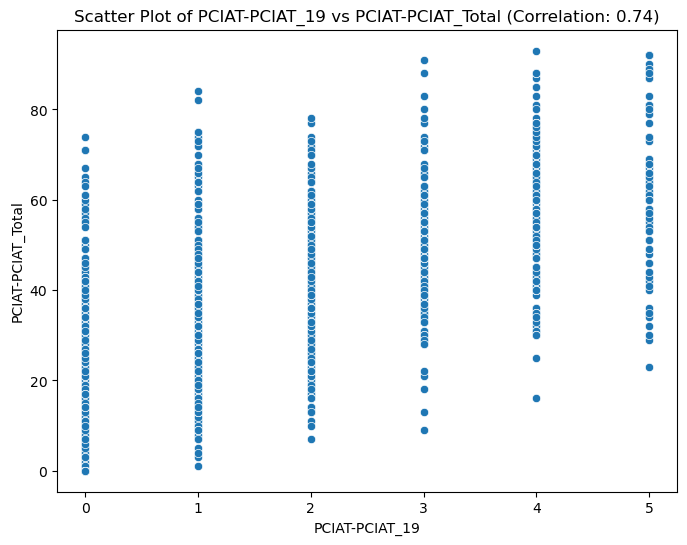

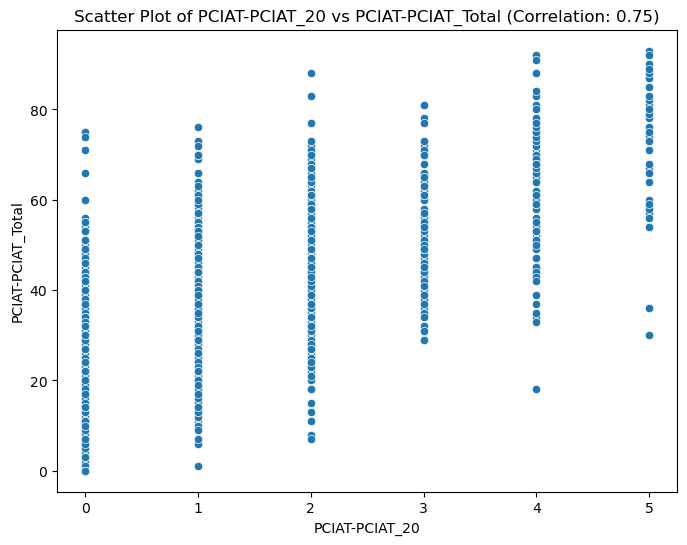

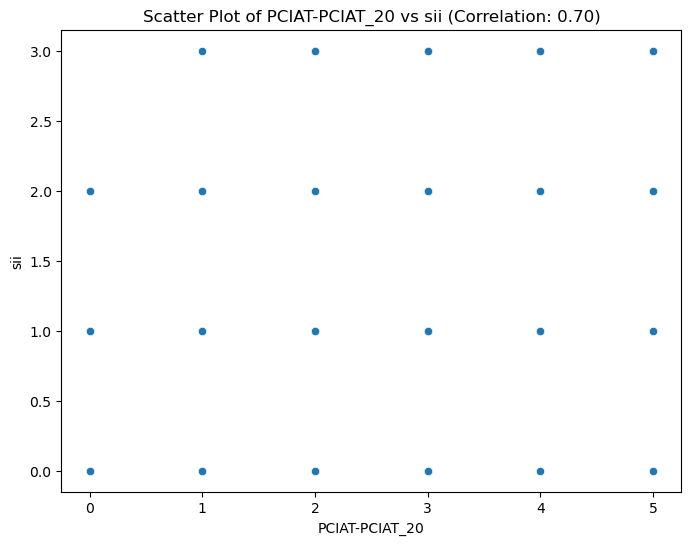

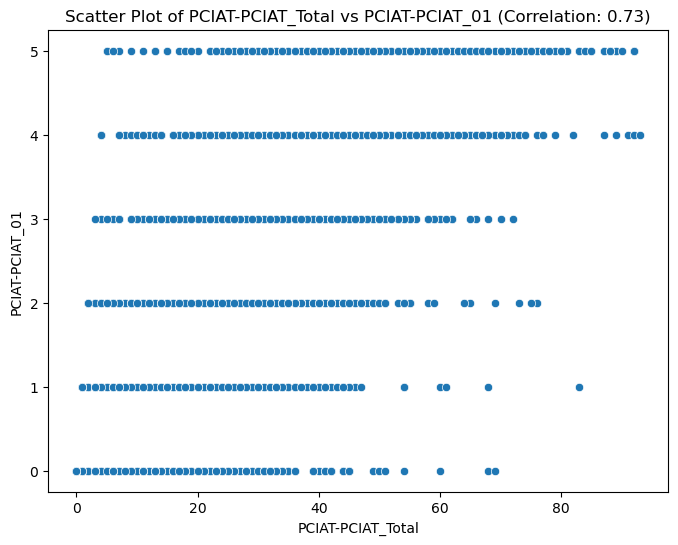

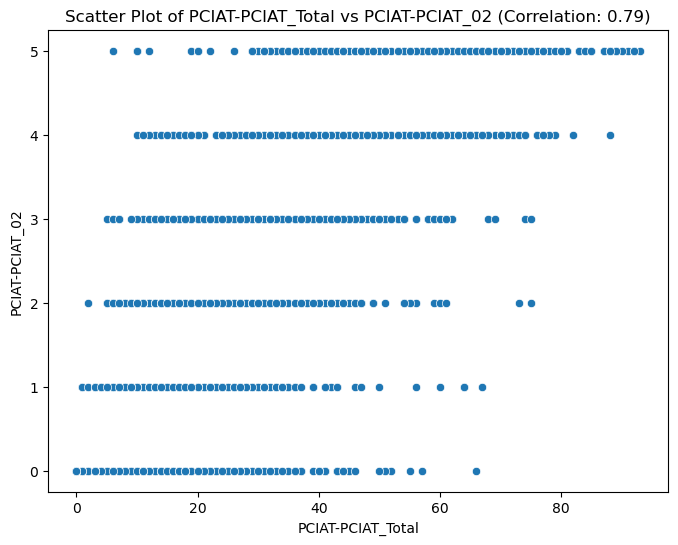

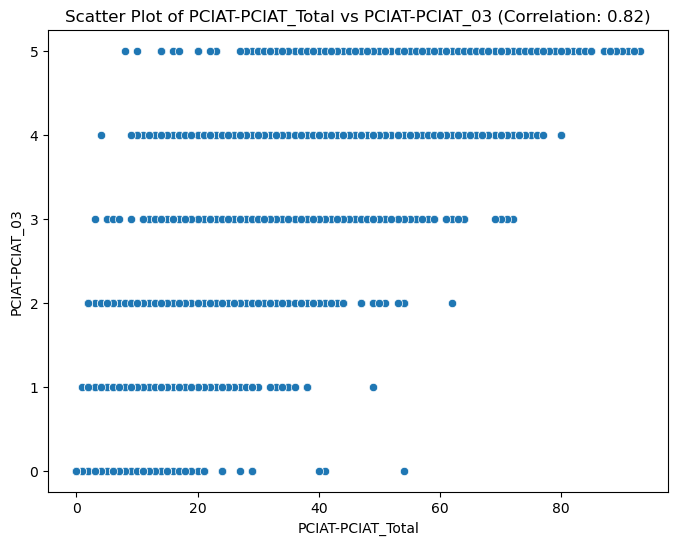

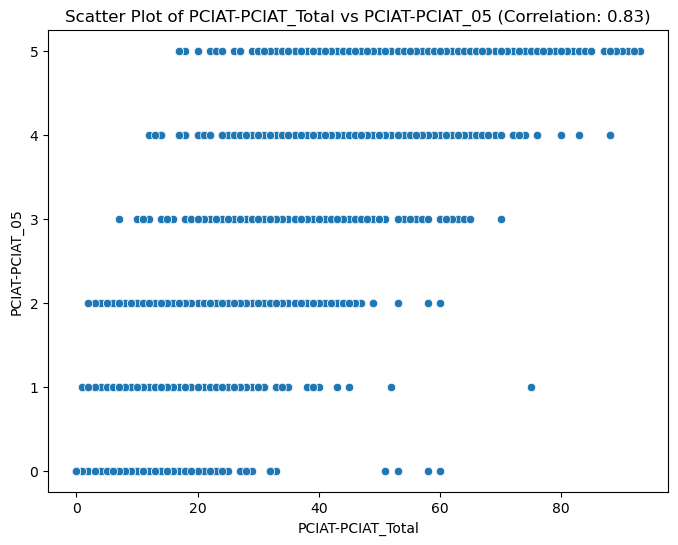

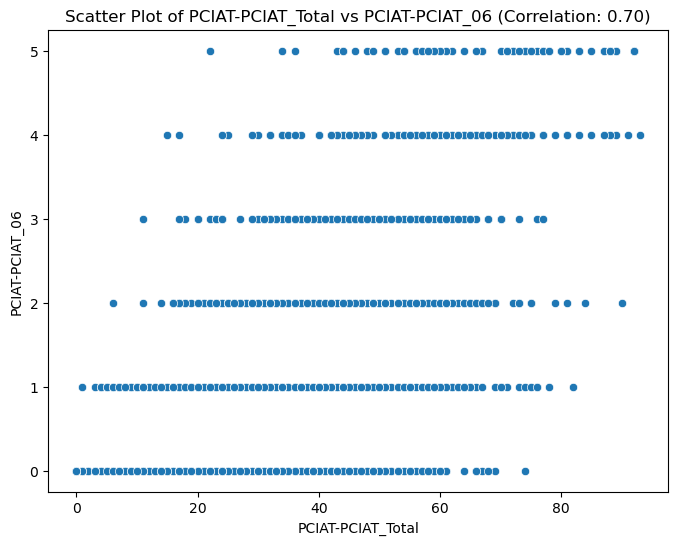

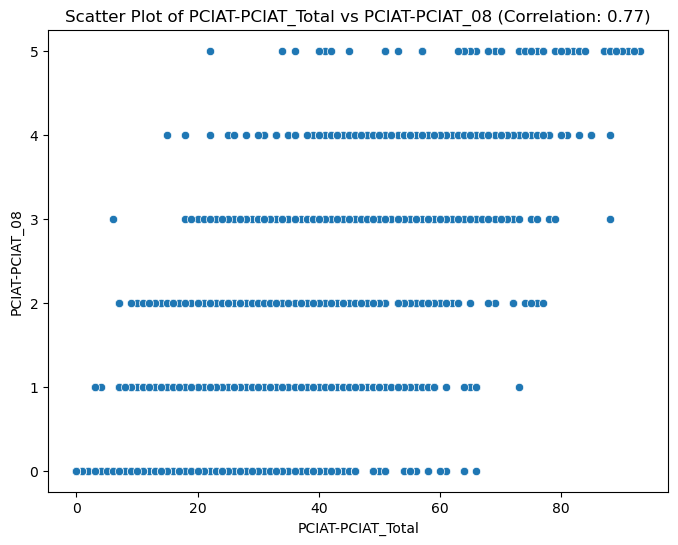

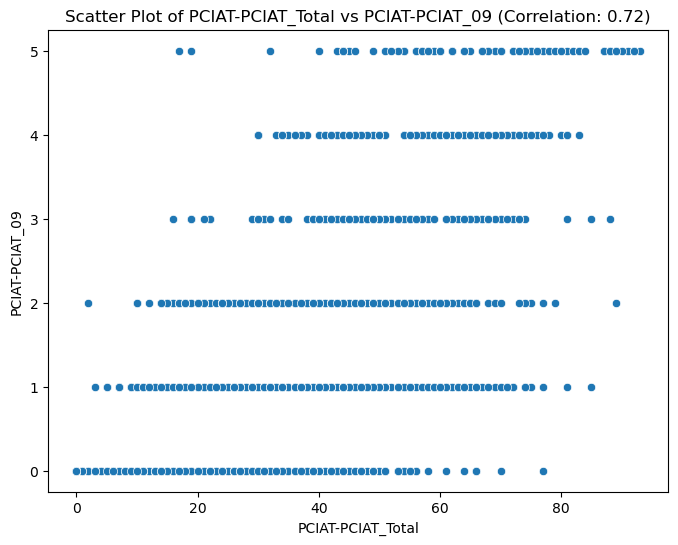

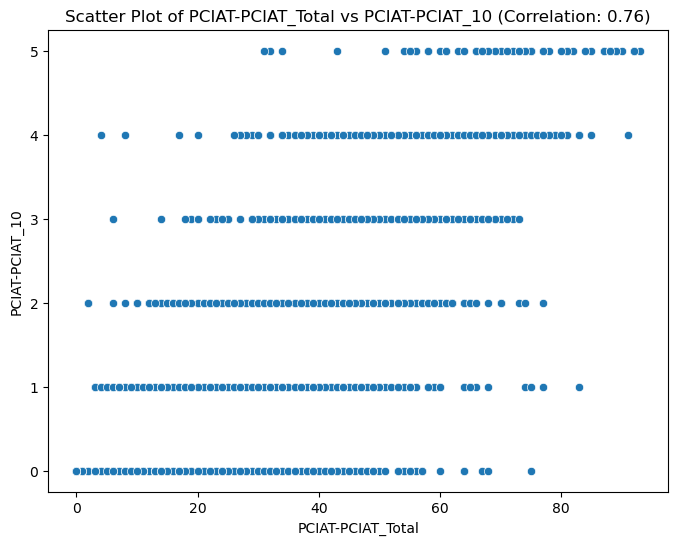

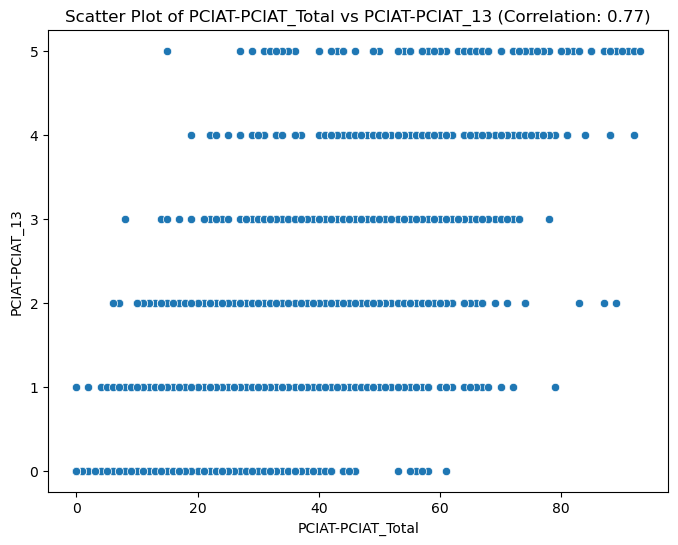

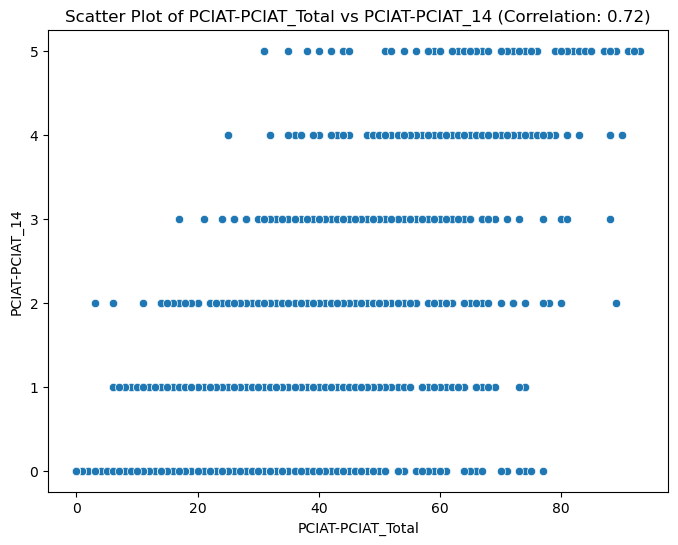

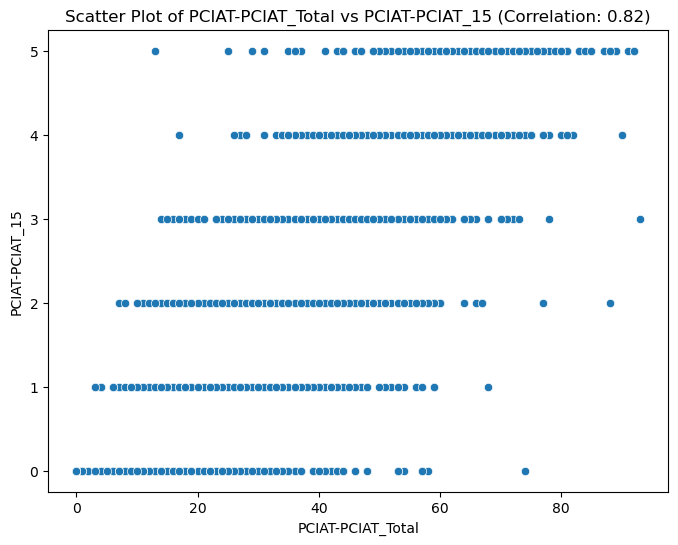

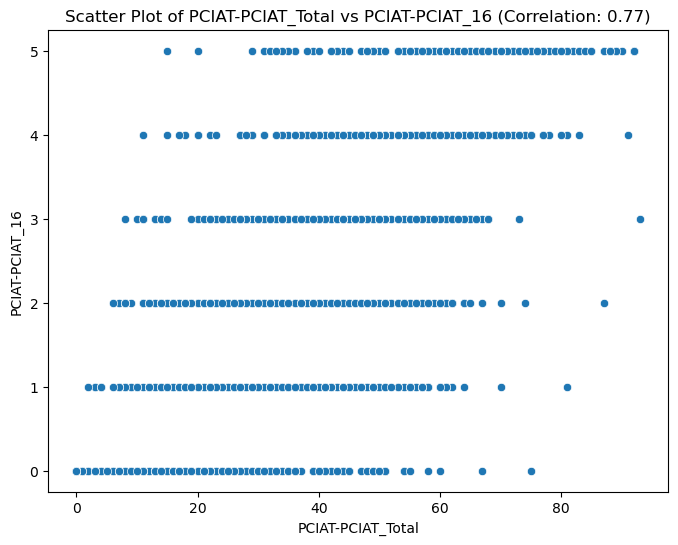

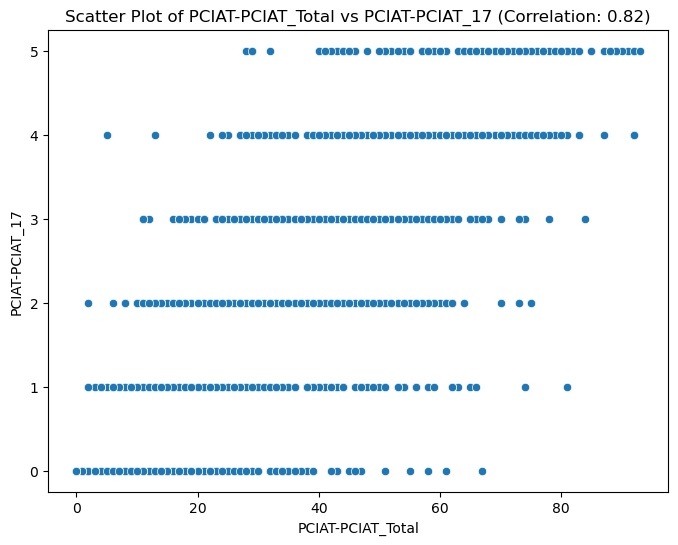

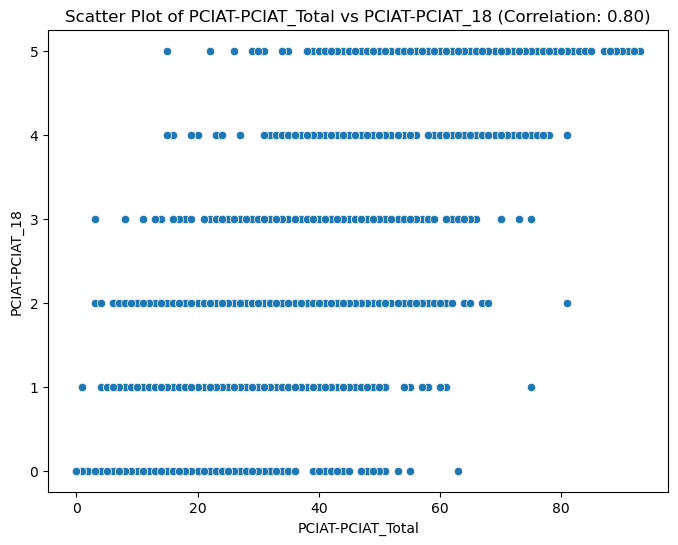

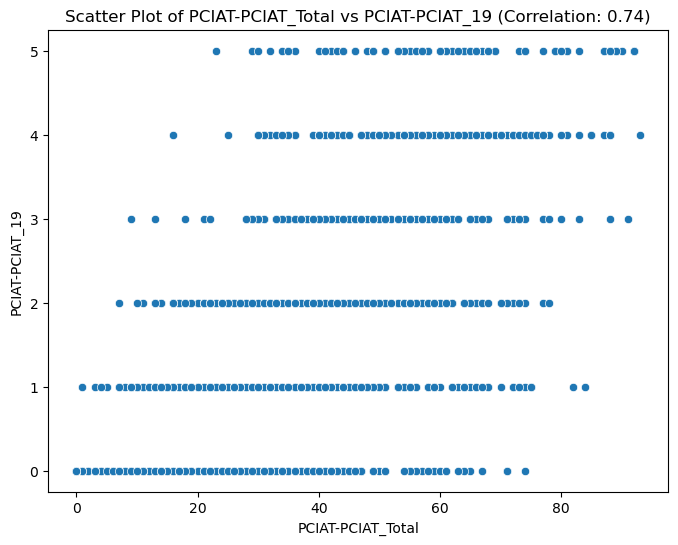

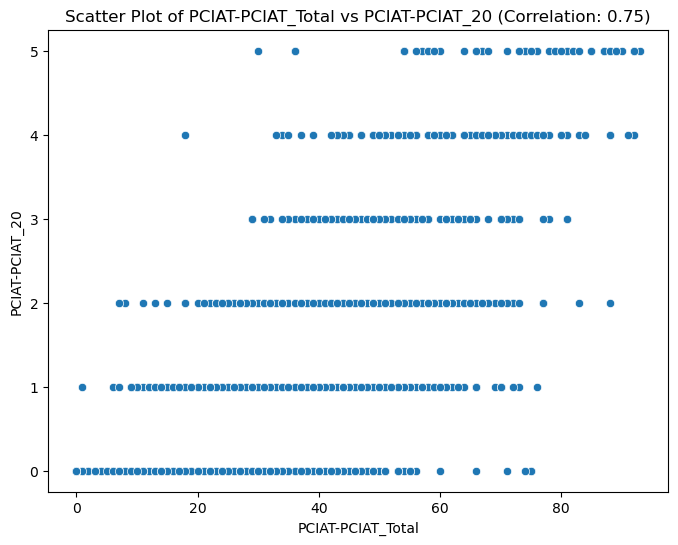

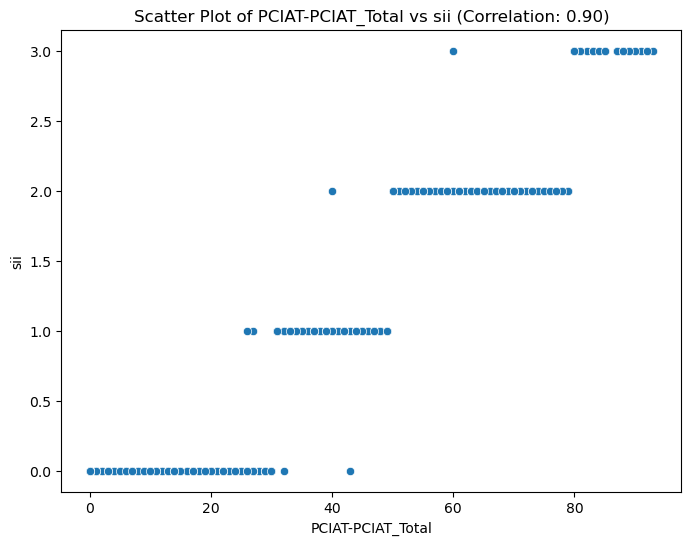

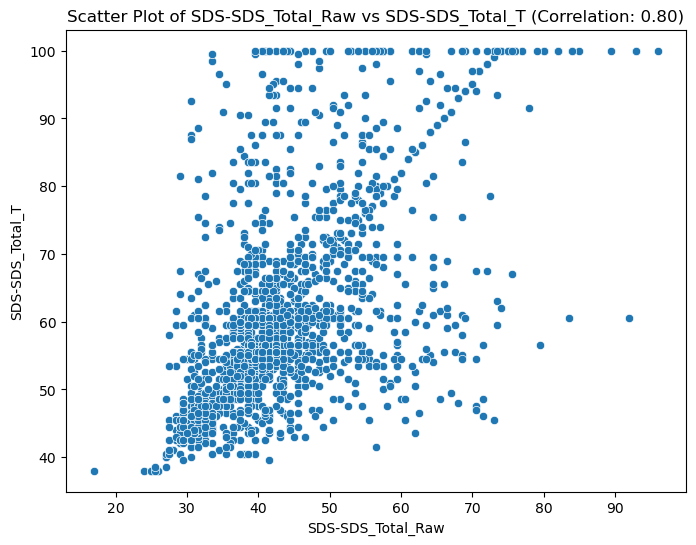

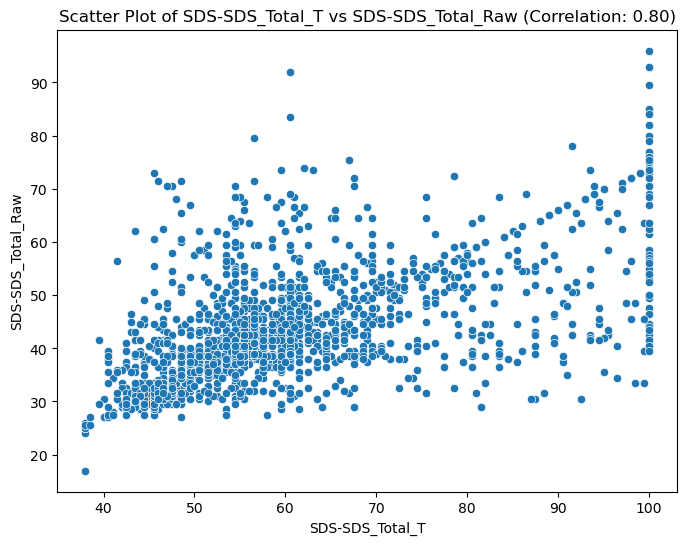

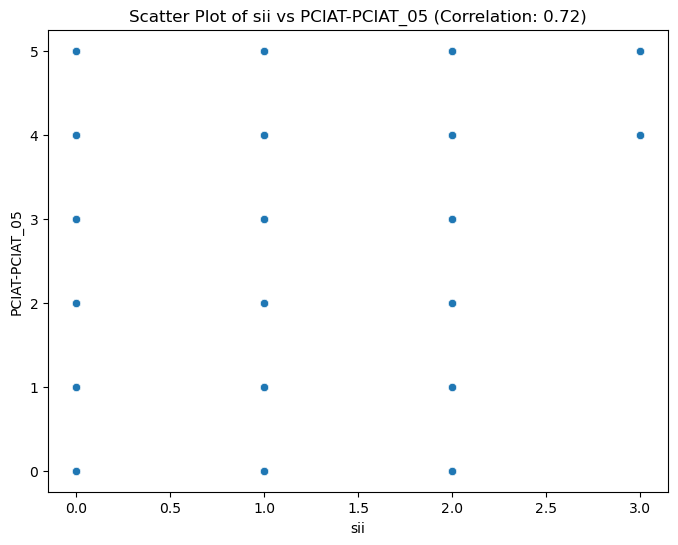

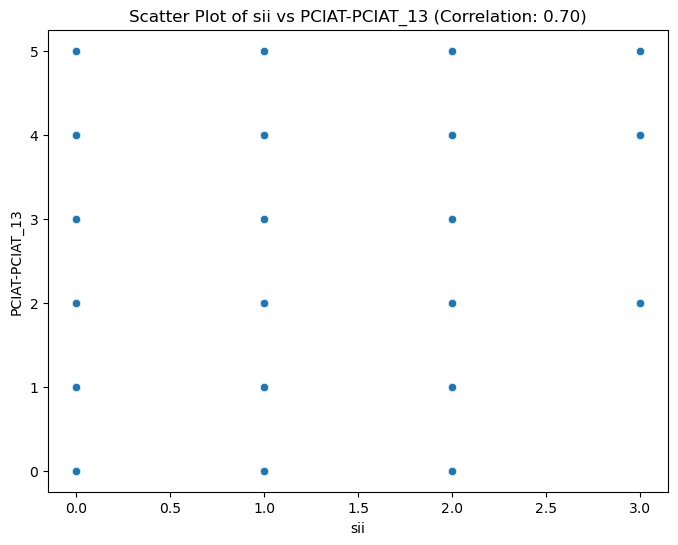

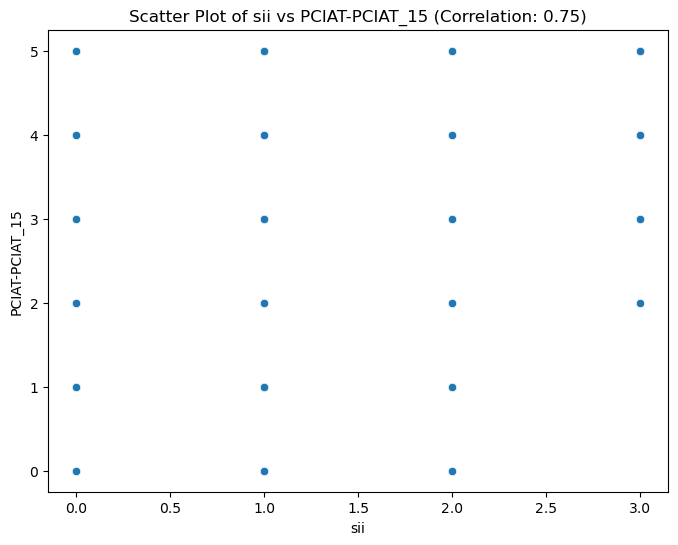

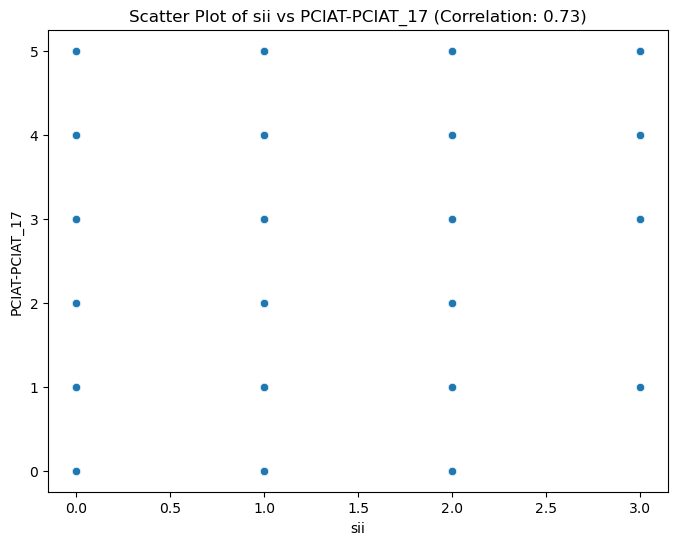

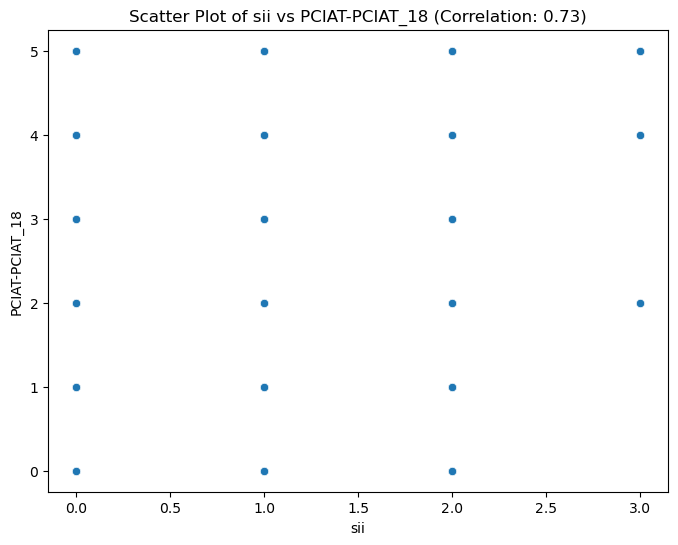

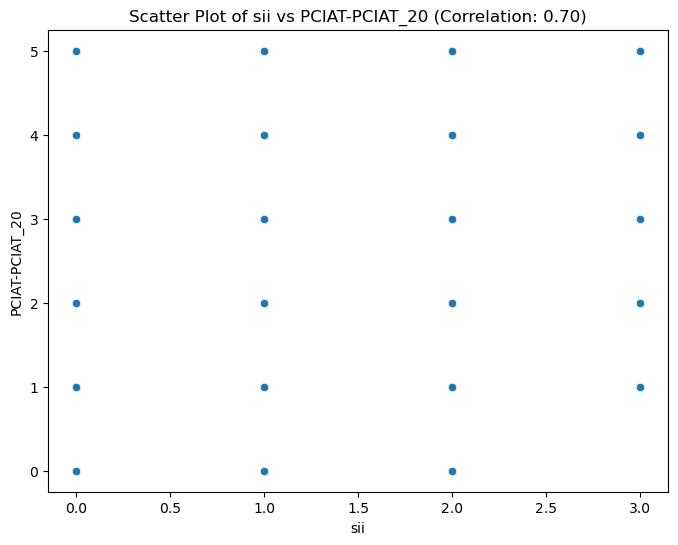

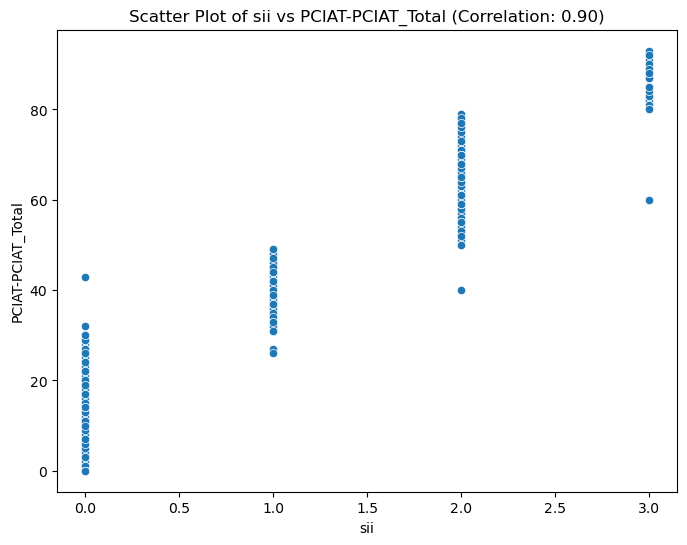

In [9]:
#printing scatter plots for the pairs of variables with correlations above the threshold
for index, row in strong_correlations.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var1, y=var2)
    plt.title(f'Scatter Plot of {var1} vs {var2} (Correlation: {row["Correlation"]:.2f})')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

In [12]:
#considering correlations that are above 0.8 or under -0.8
threshold = 0.8
very_strong_correlations = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
very_strong_correlations = very_strong_correlations.stack().reset_index()
very_strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
very_strong_correlations = very_strong_correlations[very_strong_correlations['Variable 1'] != very_strong_correlations['Variable 2']]
print(very_strong_correlations)

           Variable 1         Variable 2  Correlation
49     PCIAT-PCIAT_03  PCIAT-PCIAT_Total     0.823338
52     PCIAT-PCIAT_05  PCIAT-PCIAT_Total     0.830679
63     PCIAT-PCIAT_15  PCIAT-PCIAT_Total     0.823030
65     PCIAT-PCIAT_16     PCIAT-PCIAT_18     0.838446
67     PCIAT-PCIAT_17  PCIAT-PCIAT_Total     0.820101
68     PCIAT-PCIAT_18     PCIAT-PCIAT_16     0.838446
70     PCIAT-PCIAT_18  PCIAT-PCIAT_Total     0.801979
73  PCIAT-PCIAT_Total     PCIAT-PCIAT_03     0.823338
74  PCIAT-PCIAT_Total     PCIAT-PCIAT_05     0.830679
75  PCIAT-PCIAT_Total     PCIAT-PCIAT_15     0.823030
76  PCIAT-PCIAT_Total     PCIAT-PCIAT_17     0.820101
77  PCIAT-PCIAT_Total     PCIAT-PCIAT_18     0.801979
79  PCIAT-PCIAT_Total                sii     0.898571
81  SDS-SDS_Total_Raw    SDS-SDS_Total_T     0.800225
82    SDS-SDS_Total_T  SDS-SDS_Total_Raw     0.800225
85                sii  PCIAT-PCIAT_Total     0.898571


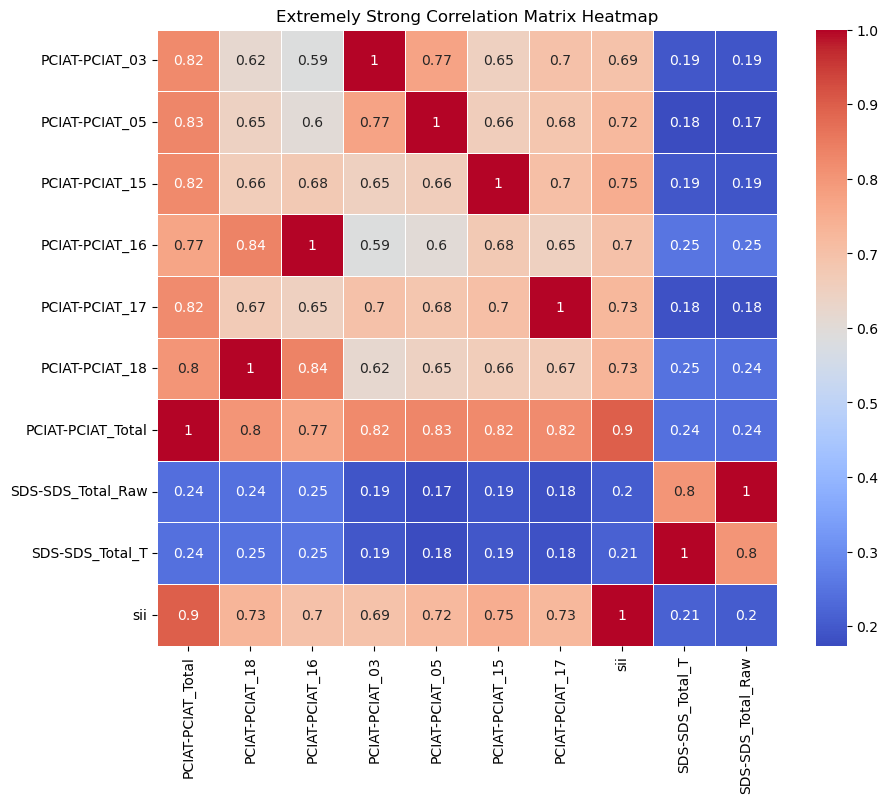

In [13]:
#creating a correlation matrix for these extremely strong correlations
extremely_strong_correlation_matrix = correlation_matrix.loc[very_strong_correlations['Variable 1'].unique(), very_strong_correlations['Variable 2'].unique()]
plt.figure(figsize=(10, 8))
sns.heatmap(extremely_strong_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Extremely Strong Correlation Matrix Heatmap')
plt.show()